In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentPerformanceFactorsCleaned.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Female,70


## PCA

Let's apply principal component analysis (PCA) to the numeric features in our dataset using singular value decomposition (SVD).

In [4]:
df_numeric_features = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']]

In [5]:
svd_U, svd_D, svd_V = np.linalg.svd(df_numeric_features)

In [6]:
# Singular values
svd_D

array([9029.89152592, 1064.09250183,  503.90521423,  134.23917965,
         99.77387677,   85.16882642])

In [7]:
# Right singular vectors
svd_V

array([[-0.17696621, -0.71396632, -0.06208453, -0.67395773, -0.01320245,
        -0.02621527],
       [ 0.03549344,  0.68044287,  0.01434909, -0.73176747,  0.00477989,
         0.00503364],
       [-0.9819664 ,  0.15629393, -0.04070408,  0.0967583 , -0.00513617,
        -0.01639583],
       [ 0.05479388,  0.05128464, -0.98011704,  0.0294575 , -0.0893996 ,
        -0.15772786],
       [-0.00442629, -0.00893276, -0.11119152, -0.00338825,  0.98556184,
         0.12725345],
       [-0.01196657, -0.01057843, -0.14591035, -0.00747962, -0.14301063,
         0.97874771]])

In [8]:
pca = df_numeric_features@svd_V.T
pca.columns = ["Principal Component " + str(i+1) for i in range(pca.shape[1])]
pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
0,-113.755545,4.670069,-2.727298,0.384564,-1.496080,0.205039
1,-89.447651,1.192925,-3.347299,-2.589354,0.734902,1.116005
2,-136.111899,1.074541,0.193832,1.351050,0.411824,0.603068
3,-135.337620,-9.984780,-5.480905,0.478943,-0.650384,0.583184
4,-113.371487,15.830802,1.685753,0.894195,1.672400,0.923741


Now let's try to determine how many principal components we should use to best describe these numeric features in the simplest representation.

In [9]:
pc_var_explained = np.square(svd_D) / np.square(svd_D).sum()

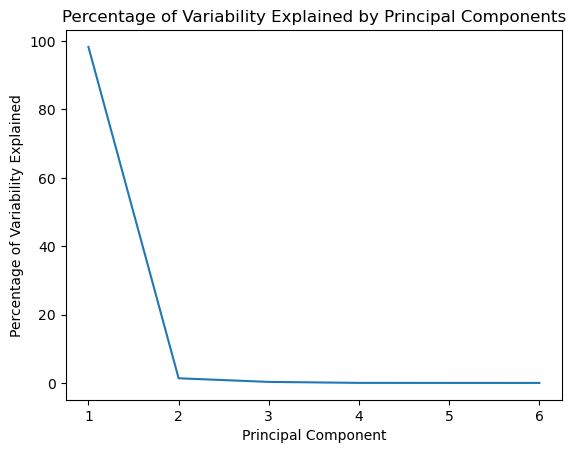

In [10]:
plt.plot(range(1, len(pc_var_explained) + 1),
         pc_var_explained * 100)
plt.xlabel("Principal Component")
plt.ylabel("Percentage of Variability Explained")
plt.title("Percentage of Variability Explained by Principal Components")
plt.show()

In [11]:
pd.DataFrame({
    "Principal Component": range(1, len(pc_var_explained) + 1),
    "Variability Explained": pc_var_explained,
    "Cumulative Variability Explained": pc_var_explained.cumsum()
})

,Principal Component,Variability Explained,Cumulative Variability Explained
0,1,0.982866,0.982866
1,2,0.013649,0.996515
2,3,0.003061,0.999575
3,4,0.000217,0.999793
4,5,0.000120,0.999913
5,6,0.000087,1.000000


As shown in both the scree plot and the table of variability explained, the first principal component captures nearly all (98.29%) of the variability in these features, so we can just use the first principal component (only one variable in a model) to describe these 6 numeric features. That's a pretty good reduction!!

In [12]:
df_numeric_features.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,23,84,7,73,0,3
1,19,64,8,59,2,4
2,24,98,7,91,2,4
3,29,89,8,98,1,4
4,19,92,6,65,3,4


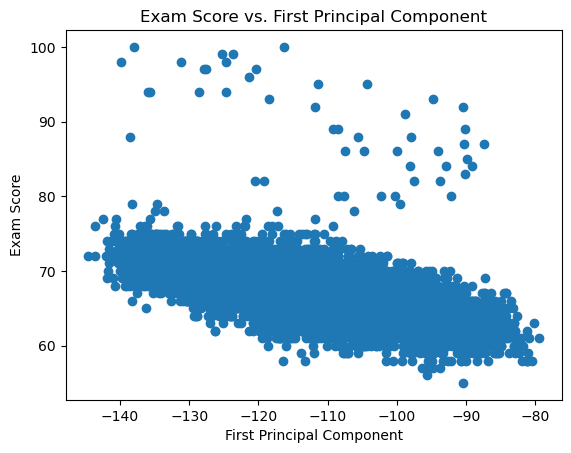

In [13]:
plt.scatter(pca['Principal Component 1'],
            df['Exam_Score']
           )
plt.xlabel('First Principal Component')
plt.ylabel('Exam Score')
plt.title('Exam Score vs. First Principal Component')
plt.show()

From this plot, we can see a slightly negative linear relationship between students' exam score and the first principal component of the 6 numeric features.